Dataset Link

//https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification/

Data Describtion

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The dataset contains train and test data. Features of train data are listed below. And the test data have already been preprocessed.

In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#reading the data
ba=pd.read_csv('new_train.csv')

In [3]:
#to see the what is data
ba.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
#to know the no.of rows & cols
ba.shape

(32950, 16)

In [5]:
ba.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [6]:
#to see the statistical analysis of data
ba.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


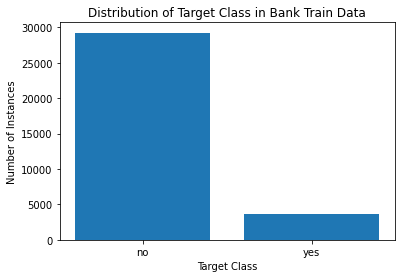

In [7]:
class_count = ba['y'].value_counts()

# Plot the distribution of the target class
plt.bar(class_count.index, class_count.values)
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Target Class in Bank Train Data')
plt.show()

In [8]:
#to know the types of variables and null values are present or not
ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [9]:
#to know the feature varibles
ba.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [10]:
#to know how many null values present in each col
ba.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [11]:
#to see the columns in data set
ba.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
#correlation between features 
ba.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


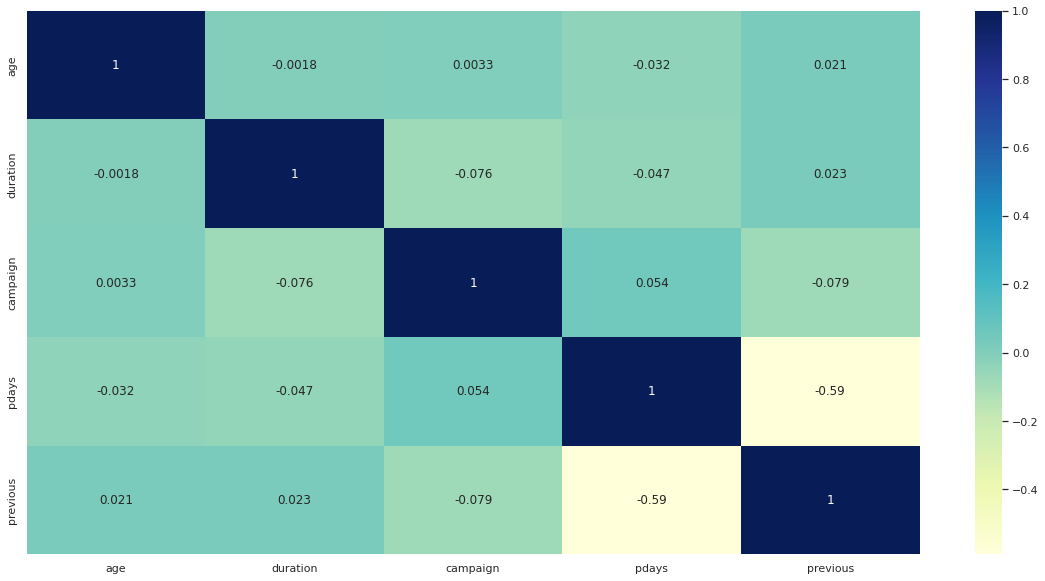

In [13]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(ba.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [14]:
#to get only numerical cols 
num=ba._get_numeric_data() 
num.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [15]:
#to get only cat cols and changing it as categorical from object 
cat=ba.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


In [16]:
cat1=cat.drop(['y'],axis=1)

In [17]:
cat1.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure


In [18]:
#assign the target variable to t
t=cat.drop(cat1,axis=1)

In [19]:
t.head(2)

,y
0,no
1,no


In [20]:
unique = cat1['job'].unique()
for value in unique:
    print(value)

blue-collar
entrepreneur
retired
admin.
student
services
technician
self-employed
management
unemployed
unknown
housemaid


In [21]:
jobs = ['blue-collar','entrepreneur','retired','admin.','student','services','technician','self-employed',
        'management','unemployed','unknown','housemaid']

In [22]:
l_map = {}
l = 0
for i in jobs:
    l_map[i] = l
    l += 1
    
cat1['JOB'] = cat1['job'].apply(lambda x: l_map[x])

In [23]:
cat1.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,JOB
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,0
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,1
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,2


In [24]:
cat1['marital'].unique()

['married', 'divorced', 'single', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']

In [25]:
Marital = ['married', 'divorced', 'single', 'unknown']

In [26]:
l_map = {}
l = 0
for i in Marital:
    l_map[i] = l
    l += 1
    
cat1['MARITAL'] = cat1['marital'].apply(lambda x: l_map[x])

In [27]:
cat1['education'].unique()

['basic.9y', 'university.degree', 'basic.4y', 'high.school', 'professional.course', 'unknown', 'basic.6y', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
                         'professional.course', 'university.degree', 'unknown']

In [28]:
Education = ['basic.9y', 'university.degree', 'basic.4y', 'high.school', 'professional.course', 'unknown',
             'basic.6y', 'illiterate']

In [29]:
l_map = {}
l = 0
for i in Education:
    l_map[i] = l
    l += 1
    
cat1['EDUCATION'] = cat1['education'].apply(lambda x: l_map[x])

In [30]:
cat1['default'].unique()

['unknown', 'no', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']

In [31]:
Default = [ 'no', 'yes', 'unknown']

In [32]:
l_map = {}
l = 0
for i in Default:
    l_map[i] = l
    l += 1
    
cat1['DEFAULT'] = cat1['default'].apply(lambda x: l_map[x])

In [33]:
cat1['housing'].unique()

['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']

In [34]:
Housing = ['no', 'yes', 'unknown']

In [35]:
l_map = {}
l = 0
for i in Housing:
    l_map[i] = l
    l += 1
    
cat1['HOUSING'] = cat1['housing'].apply(lambda x: l_map[x])

In [36]:
cat1['loan'].unique()

['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']

In [37]:
Loan = ['no', 'yes', 'unknown']

In [38]:
l_map = {}
l = 0
for i in Loan:
    l_map[i] = l
    l += 1
    
cat1['LOAN'] = cat1['loan'].apply(lambda x: l_map[x])

In [39]:
cat1['contact'].unique()

['cellular', 'telephone']
Categories (2, object): ['cellular', 'telephone']

In [40]:
Contact = ['cellular', 'telephone']

In [41]:
l_map = {}
l = 0
for i in Contact:
    l_map[i] = l
    l += 1
    
cat1['CONTACT'] = cat1['contact'].apply(lambda x: l_map[x])

In [42]:
cat1['month'].unique()

['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep', 'dec']
Categories (10, object): ['apr', 'aug', 'dec', 'jul', ..., 'may', 'nov', 'oct', 'sep']

In [43]:
Month = ['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep', 'dec']

In [44]:
l_map = {}
l = 0
for i in Month:
    l_map[i] = l
    l += 1
    
cat1['MONTH'] = cat1['month'].apply(lambda x: l_map[x])

In [45]:
cat1['day_of_week'].unique()

['wed', 'mon', 'tue', 'fri', 'thu']
Categories (5, object): ['fri', 'mon', 'thu', 'tue', 'wed']

In [46]:
Day_of_week = ['wed', 'mon', 'tue', 'fri', 'thu']

In [47]:
l_map = {}
l = 0
for i in Day_of_week:
    l_map[i] = l
    l += 1
    
cat1['Day_Of_Week'] = cat1['day_of_week'].apply(lambda x: l_map[x])

In [48]:
cat1['poutcome'].unique()

['nonexistent', 'failure', 'success']
Categories (3, object): ['failure', 'nonexistent', 'success']

In [49]:
Poutcome = ['nonexistent', 'failure', 'success']

In [50]:
l_map = {}
l = 0
for i in Poutcome:
    l_map[i] = l
    l += 1
    
cat1['POUTCOME'] = cat1['poutcome'].apply(lambda x: l_map[x])

In [51]:
cat1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,0,0,0,2,0,0,0,0,0,0
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,1,0,1,0,0,0,1,0,0,1
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,2,0,2,0,0,0,0,1,1,0
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,3,0,1,0,1,0,1,2,1,0
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,2,1,1,0,0,0,0,3,2,0


In [52]:
cat2 = cat1.drop(['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome'], axis=1)

In [53]:
cat2.head()

,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME
0,0,0,0,2,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,1
2,2,0,2,0,0,0,0,1,1,0
3,3,0,1,0,1,0,1,2,1,0
4,2,1,1,0,0,0,0,3,2,0


In [54]:
t=pd.DataFrame(t,columns=['y'])
t.head()

,y
0,no
1,no
2,yes
3,no
4,no


In [55]:
t.y.value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [56]:
#converting the object to cat cols
cat1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,0,0,0,2,0,0,0,0,0,0
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,1,0,1,0,0,0,1,0,0,1
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,2,0,2,0,0,0,0,1,1,0
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,3,0,1,0,1,0,1,2,1,0
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,2,1,1,0,0,0,0,3,2,0


In [57]:
t['y'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [58]:
target = ['no', 'yes']

In [59]:
l_map = {}
l = 0
for i in target:
    l_map[i] = l
    l += 1
    
t['TARGET'] = t['y'].apply(lambda x: l_map[x])

In [60]:
T = t.drop(['y'], axis=1)
T.head()

,TARGET
0,0
1,0
2,1
3,0
4,0


In [61]:
#merging the num cols and dummified data as single data
final_data=num.join(cat2)
final_data.head()

,age,duration,campaign,pdays,previous,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME
0,49,227,4,999,0,0,0,0,2,0,0,0,0,0,0
1,37,202,2,999,1,1,0,1,0,0,0,1,0,0,1
2,78,1148,1,999,0,2,0,2,0,0,0,0,1,1,0
3,36,120,2,999,0,3,0,1,0,1,0,1,2,1,0
4,59,368,2,999,0,2,1,1,0,0,0,0,3,2,0


In [62]:
#checking the shape of merged data
final_data.shape

(32950, 15)

In [63]:
final_data1=final_data.join(T)
final_data1.head()

,age,duration,campaign,pdays,previous,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME,TARGET
0,49,227,4,999,0,0,0,0,2,0,0,0,0,0,0,0
1,37,202,2,999,1,1,0,1,0,0,0,1,0,0,1,0
2,78,1148,1,999,0,2,0,2,0,0,0,0,1,1,0,1
3,36,120,2,999,0,3,0,1,0,1,0,1,2,1,0,0
4,59,368,2,999,0,2,1,1,0,0,0,0,3,2,0,0


In [64]:
#checking the shape of merged data
final_data1.shape

(32950, 16)

In [65]:
final_data1['pdays'].unique()

array([999,   3,   6,  10,   8,   4,   9,  11,   7,  12,   5,   2,  22,
        25,  15,  17,   0,  14,  13,   1,  16,  18,  19,  21,  20,  27,
        26])

In [66]:
class_count1 = final_data1['pdays'].value_counts()
class_count1

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [67]:
final_data1['pdays'] = final_data1['pdays'].replace(999, pd.NA)

In [68]:
final_data1['pdays'] = final_data1['pdays'].fillna(0)

In [69]:
final_data1['pdays'] = final_data1['pdays'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
print(final_data1['pdays'].unique())

[0 1]


In [71]:
final_data1['previous'].unique()

array([0, 1, 3, 4, 2, 6, 5, 7])

In [72]:
final_data1['TARGET'].value_counts()

0    29238
1     3712
Name: TARGET, dtype: int64

In [73]:
#checking the null values in merged data
final_data1.isnull().sum()

age            0
duration       0
campaign       0
pdays          0
previous       0
JOB            0
MARITAL        0
EDUCATION      0
DEFAULT        0
HOUSING        0
LOAN           0
CONTACT        0
MONTH          0
Day_Of_Week    0
POUTCOME       0
TARGET         0
dtype: int64

In [74]:
#checking the shape of the data
final_data1.shape

(32950, 16)

In [75]:
final_data1.head()

,age,duration,campaign,pdays,previous,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,Day_Of_Week,POUTCOME,TARGET
0,49,227,4,0,0,0,0,0,2,0,0,0,0,0,0,0
1,37,202,2,0,1,1,0,1,0,0,0,1,0,0,1,0
2,78,1148,1,0,0,2,0,2,0,0,0,0,1,1,0,1
3,36,120,2,0,0,3,0,1,0,1,0,1,2,1,0,0
4,59,368,2,0,0,2,1,1,0,0,0,0,3,2,0,0


In [76]:
final_data1=final_data1.drop(['pdays','previous'],axis=1)

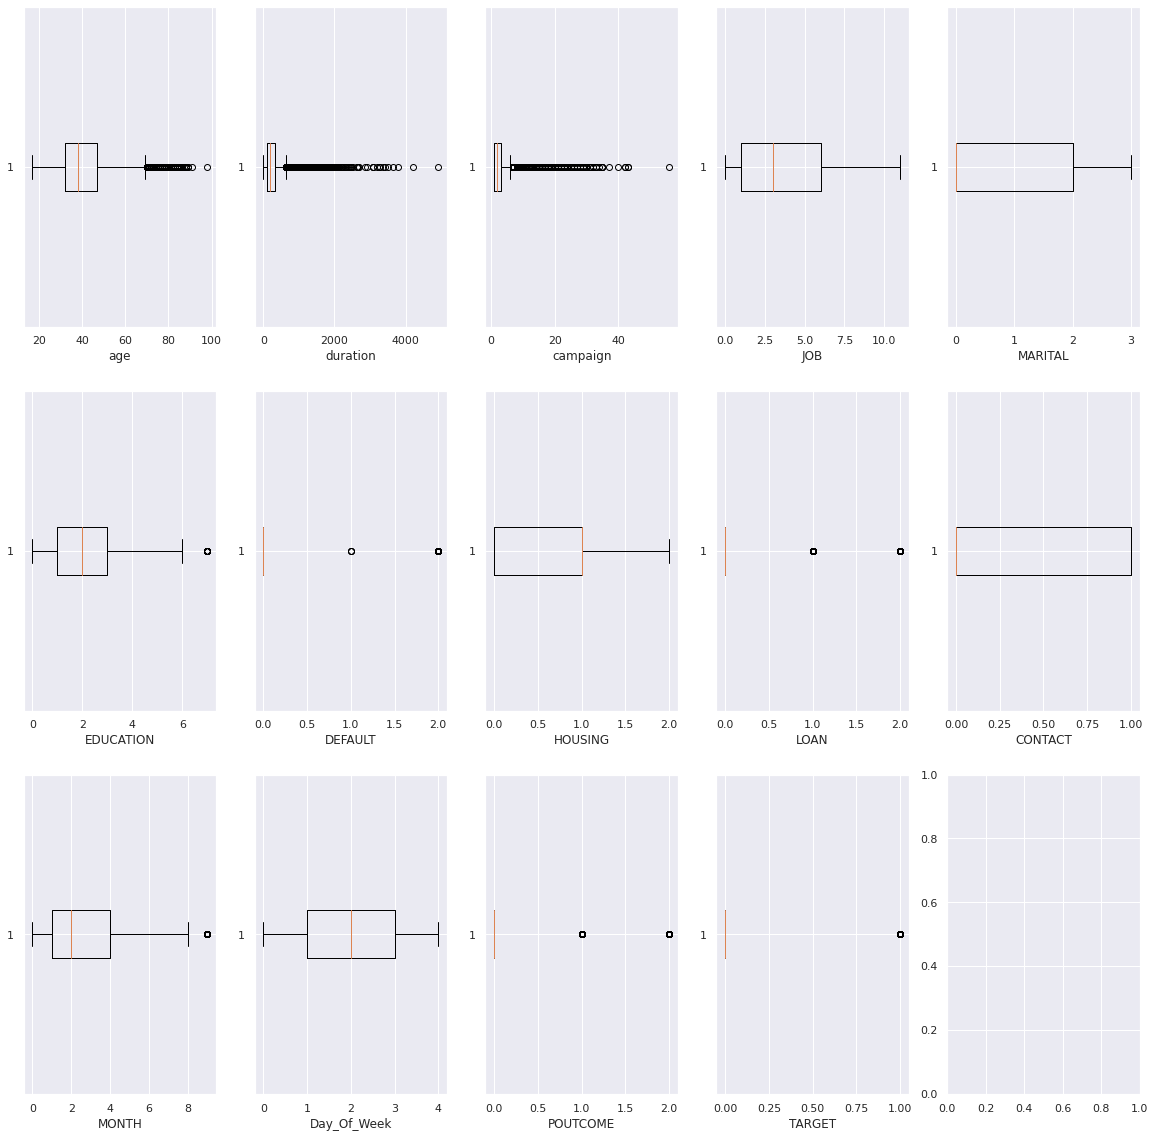

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
for i, column in enumerate(final_data1):
    row = i // 5
    col = i % 5
    if row < 3 and col < 5:
        ax = axes[row][col]
        ax.boxplot(final_data1[column].dropna(), vert=False)
        ax.set_xlabel(column)
plt.show()

In [78]:
#concating the target variable to data
data=final_data1.drop(['TARGET'],axis=1)
target=final_data1['TARGET']

In [79]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [80]:
smk=SMOTETomek(random_state=42)

In [81]:
data,target=smk.fit_resample(data,target)

In [82]:
class Node:
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.left = None
        self.right = None
        self.feature = None
        self.value = None
        self.result = None
        
class CHAID:
    def __init__(self, max_depth=3, min_samples_split=2, alpha=0.05):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.alpha = alpha
        
    def fit(self, data, target):
        self.root = Node(data, target)
        self._split(self.root, 1)
        
    def predict(self, data):
        results = []
        for i in range(len(data)):
            current = self.root
            while current.result is None:
                if data[i][current.feature] <= current.value:
                    current = current.left
                else:
                    current = current.right
            results.append(current.result)
        return np.array(results)
    
    def _split(self, node, depth):
        if depth == self.max_depth or len(node.data) < self.min_samples_split:
            node.result = np.argmax(np.bincount(node.target))
            return
        best_feature = None
        best_value = None
        best_score = 0
        for feature in range(node.data.shape[1]):
            values = np.unique(node.data[:,feature])
            for value in values:
                left_target = node.target[node.data[:,feature] <= value]
                right_target = node.target[node.data[:,feature] > value]
                if len(left_target) < self.min_samples_split or len(right_target) < self.min_samples_split:
                    continue
                score = self._score(node.target, left_target, right_target)
                if score > best_score:
                    best_feature = feature
                    best_value = value
                    best_score = score
        if best_score == 0:
            node.result = np.argmax(np.bincount(node.target))
            return
        node.feature = best_feature
        node.value = best_value
        left_data = node.data[node.data[:,best_feature] <= best_value]
        left_target = node.target[node.data[:,best_feature] <= best_value]
        right_data = node.data[node.data[:,best_feature] > best_value]
        right_target = node.target[node.data[:,best_feature] > best_value]
        node.left = Node(left_data, left_target)
        node.right = Node(right_data, right_target)
        self._split(node.left, depth+1)
        self._split(node.right, depth+1)
        
    def _score(self, parent, left, right):
        score = 0
        for target in np.unique(parent):
            pl = np.sum(left == target) / len(left)
            pr = np.sum(right == target) / len(right)
            pt = np.sum(parent == target) / len(parent)
            score += pt * (np.abs(pl - pr) - self.alpha) ** 2
        return score

In [83]:
#importing the spliting slibraries to split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(data,target,random_state=104,test_size=0.25,shuffle=True)

In [84]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [85]:
# Create an instance of the Node class
dt = CHAID()

# Fit the decision tree to the training data
model=dt.fit(x_train,y_train)


In [86]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [87]:
y_pred = dt.predict(x_train)

In [88]:
y_pred1 = dt.predict(x_test)

In [89]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
print('Accuracy:', accuracy(y_train, y_pred))
print('Accuracy:', accuracy(y_test, y_pred1))

Accuracy: 0.5872019787921123
Accuracy: 0.5877018206801786


In [91]:
import itertools

class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
        
    def fit(self, X, y):
        best_score = float('-inf')
        best_params = None
        param_combinations = list(itertools.product(*self.param_grid.values()))
        for params in param_combinations:
            current_estimator = self.estimator(**dict(zip(self.param_grid.keys(), params)))
            scores = []
            fold_size = len(X) // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = start + fold_size
                X_test = X[start:end]
                y_test = y[start:end]
                X_train = np.concatenate([X[:start], X[end:]])
                y_train = np.concatenate([y[:start], y[end:]])
                current_estimator.fit(X_train, y_train)
                y_pred = current_estimator.predict(X_test)
                score = np.mean(y_pred == y_test)
                scores.append(score)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.best_estimator_ = self.estimator(**dict(zip(self.param_grid.keys(), best_params)))
        self.best_estimator_.fit(X, y)
        return self
        
    def predict(self, X):
        return self.best_estimator_.predict(X)


In [92]:
param_grid = {'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4], 'alpha': [0.01, 0.05, 0.1]}
chaids = GridSearchCV(CHAID, param_grid)
grid=chaids.fit(x_train, y_train)



In [93]:
y_pred_train = chaids.predict(x_train)

In [94]:
print('Accuracy:', accuracy(y_train, y_pred_train))

Accuracy: 0.7176098756384124


In [95]:
y_pred_test = chaids.predict(x_test)

In [96]:
print('Accuracy:', accuracy(y_test, y_pred_test))

Accuracy: 0.7212641703881828


In [97]:
def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recall_list = []
    for i in classes:
        tp = np.sum((y_true == i) & (y_pred == i))
        fn = np.sum((y_true == i) & (y_pred != i))
        recall = tp / (tp + fn)
        recall_list.append(recall)
    return recall_list

In [109]:
print('recall_train:', recall(y_train, y_pred_train))

recall_train: [0.4900416647589396, 0.9453762258271469]


In [98]:
print('recall_test:', recall(y_test, y_pred_test))

recall_test: [0.4972482113373693, 0.9446960340332098]


In [99]:
test=pd.read_csv('/content/new_test.csv')
test.head()
#age	duration	campaign	job	marital	education	default	housing	loan	contact	month	day_of_week	poutcome

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [100]:
print('Current feature order:',test.columns.tolist())

Current feature order: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


In [101]:
new_order = ['age', 'duration', 'campaign', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [102]:
test = test[new_order]

In [103]:
test.head()

,age,duration,campaign,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,32,131,5,4,0,6,0,0,0,0,3,3,1
1,37,100,1,10,3,6,0,0,0,0,4,3,1
2,55,131,2,5,0,5,1,2,0,0,3,2,1
3,44,48,2,2,1,0,1,0,0,1,4,3,1
4,28,144,2,0,2,3,0,0,0,0,5,0,1


In [104]:
test=np.array(test)

In [105]:
test = chaids.predict(test)

In [106]:
test

array([1, 1, 1, ..., 1, 0, 1])

Define a function to calculate the split metric for a given split:

1.1. Calculate the proportion of each class label in the left and right subsets

1.2. Calculate the split metric (e.g., Gini impurity, entropy, etc.) using the class label proportions

1.3. Return the split metric

Define a function to determine the best split for a given node:

2.1. Initialize variables to store the best split information:
- best_feature_index: an integer representing the index of the best feature to split on
- best_split_value: a float representing the best value to split the best feature on
- best_split_metric: a float representing the split metric of the best split
- best_left_subset_indices: a boolean vector representing the indices of the left subset for the best split
- best_right_subset_indices: a boolean vector representing the indices of the right subset for the best split
2.2. Loop over each feature in X:

2.2.1. Loop over each unique value in the feature:

2.2.1.1. Split the data into left and right subsets based on the feature and split value

2.2.1.2. Calculate the split metric for the current split using the left and right subsets

2.2.1.3. Update the best split information if the current split is better than the current best split

2.3. Return the best split information

Define a function to recursively build the decision tree:

3.1. Determine the majority class label and its count for the current node


3.2. Base case: if max depth or min samples split is reached, return a leaf node with the majority class label

3.3. Determine the best split for the current node

3.4. Base case: if the best split does not improve the split metric, return a leaf node with the majority class label

3.5. Recursively build the left and right subtrees using the left and right subsets from the best split

3.6. Return the decision node with the best split information and left and right subtrees

Define a function to make predictions using the decision tree:

4.1. If the current node is a leaf node, return the majority class label

4.2. If the feature value of the input at the split feature index is less than the split value, recursively predict using the left subtree

4.3. If the feature value of the input at the split feature index is greater than or equal to the split value, recursively predict using the right subtree

Build the decision tree using the build_decision_tree function on the input data X and target variable y with the specified max_depth and min_samples_split.

Make predictions using the predict function on the input data X and the decision tree from step 5.

Return the predicted target variable y_pred.


Inputs:

X: a matrix of size (n_samples, n_features) representing the input features
y: a vector of size (n_samples,) representing the target variable
max_depth: an integer representing the maximum depth of the decision tree
min_samples_split: an integer representing the minimum number of samples required to split a node



Outputs:

y_pred: a vector of size (n_samples,) representing the predicted target variable
